In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm

In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv(f'../data/MSFT/2018-10-01 - 2021-10-02.csv', index_col=0, parse_dates=['time'], dayfirst=True)
df.head()

,figi,interval,o,c,h,l,v,time
0,BBG000BPH459,15min,115.02,115.20,115.20,115.02,9,2018-10-01 07:00:00+00:00
1,BBG000BPH459,15min,115.20,115.20,115.20,115.20,3,2018-10-01 07:30:00+00:00
2,BBG000BPH459,15min,115.19,115.19,115.19,115.19,1,2018-10-01 07:45:00+00:00
3,BBG000BPH459,15min,115.20,115.41,115.44,115.20,17,2018-10-01 08:00:00+00:00
4,BBG000BPH459,15min,115.42,115.15,115.43,115.15,12,2018-10-01 08:15:00+00:00


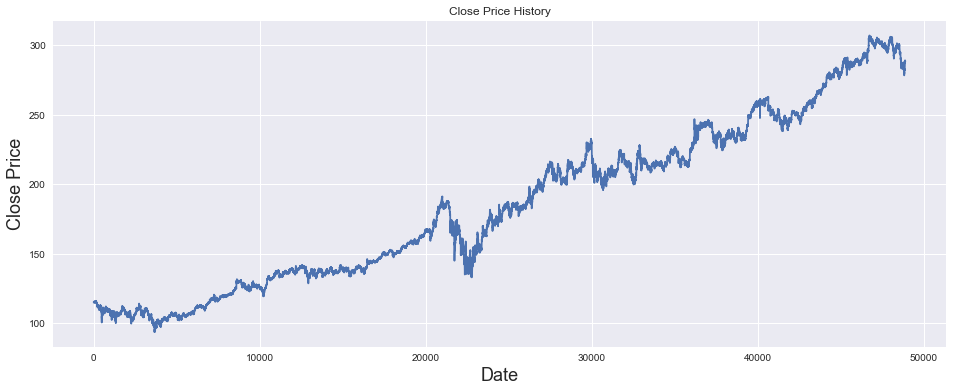

In [4]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['c'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [5]:
test_size = 74
data = df.filter('c')
dataset = data.values
train_df = dataset[:-test_size]
test_df = dataset[-test_size:]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_df)
scaled_data

array([[0.10050652],
       [0.10050652],
       [0.10045962],
       ...,
       [0.88542351],
       [0.88373511],
       [0.88007692]])

In [7]:
x_train = []
y_train = []

for i in range(test_size, len(scaled_data)):
    x_train.append(scaled_data[i - test_size:i, 0])
    y_train.append(scaled_data[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train

array([[0.10050652, 0.10050652, 0.10045962, ..., 0.10064722, 0.10106932,
        0.10139762],
       [0.10050652, 0.10045962, 0.10149142, ..., 0.10106932, 0.10139762,
        0.10163212],
       [0.10045962, 0.10149142, 0.10027202, ..., 0.10139762, 0.10163212,
        0.10130382],
       ...,
       [0.89414689, 0.89775818, 0.89935278, ..., 0.88307851, 0.88331301,
        0.88589251],
       [0.89775818, 0.89935278, 0.89921208, ..., 0.88331301, 0.88589251,
        0.88542351],
       [0.89935278, 0.89921208, 0.89925898, ..., 0.88589251, 0.88542351,
        0.88373511]])

In [10]:
model = RandomForestRegressor(n_jobs=-1, verbose=True)

In [11]:
%%time

model.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s


Wall time: 41.4 s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.3s finished


RandomForestRegressor(n_jobs=-1, verbose=True)

In [12]:
x_test = x_train[len(x_train) - 1:].copy()
predictions = []

for i in range(len(test_df)):
    predictions.append(model.predict(x_test).tolist())
    x_test = np.append(x_test[0][1:], predictions[i])
    x_test = x_test.reshape(1, 74)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_job

In [13]:
predictions = np.array(predictions)
predictions = predictions.reshape(74, 1)
predictions = scaler.inverse_transform(predictions)

In [14]:
train = data[:-test_size]
valid = data[-test_size:]
valid['Predicted'] = predictions.copy()
valid

C:\Users\spark\AppData\Local\Temp/ipykernel_1744/1750504192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted'] = predictions.copy()


,c,Predicted
48818,281.03,281.7559
48819,280.64,281.7136
48820,280.60,281.6946
48821,280.99,281.7066
48822,280.80,281.6546
...,...,...
48887,288.55,281.5659
48888,288.44,281.5626
48889,288.56,281.5664
48890,288.56,281.5731


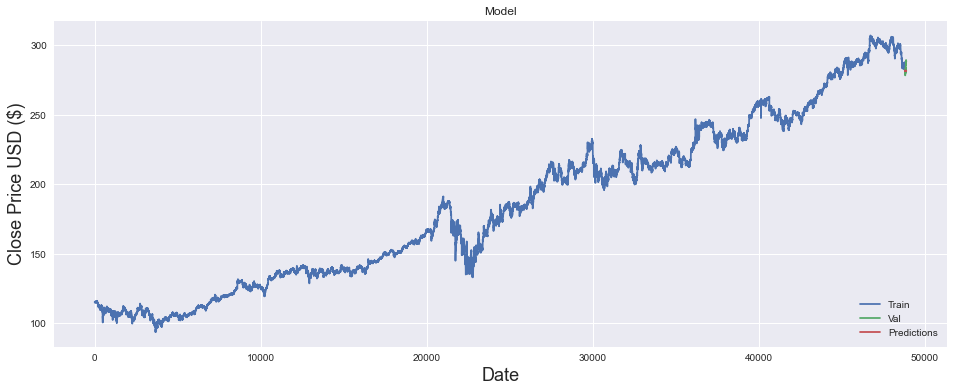

In [15]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c', 'Predicted']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

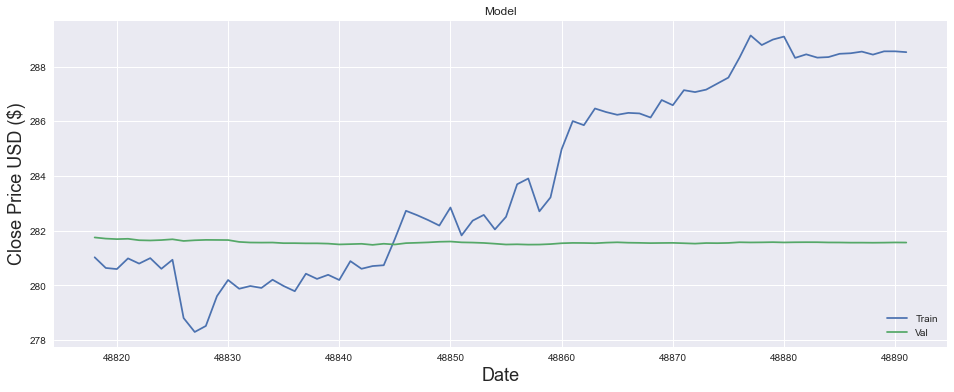

In [16]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['c', 'Predicted']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
def NRMSE(y:pd.Series, y_hat:pd.Series):
    rmse = np.std(y_hat - y)

    return(rmse / np.mean(y))

In [18]:
NRMSE(valid['c'], valid['Predicted'])

0.012184330545862564